# Sentiment Analysis reviews of Austin Coffee
Ismayil Ismayilov 444459

Vadym Dudarenko 444820

Ivan Grakhovski 444422


# 1.Introduction

The goal of the project is to analyze review from Austin coffe and predict if it is positive, negative or neutral feedback 

We are going to make data processing for futher data modeling. We will use deep leatning algoritm(LSTM model) to assses the reviews from the customers.  

The main assumption is to understand if it is a good place to visit or people are satisfited with this place in general

# 2.Data

Nearly 7,000 reviews scraped from yelp.com about Austin coffee shops, attributes replaced, sentiments around attributes


Link to the dataset: https://data.world/rdowns26/austin-coffee-yelp-reviews

In [1]:
#import necessary packagies
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
#import the dataset
df= pd.read_csv("C:\\Users\\Vadym\\Desktop\\Text mining\\project\\ratings_and_sentiments.csv")

In [3]:
df.head(5)

,coffee_shop_name,review_text,rating,num_rating,cat_rating,bool_HIGH,overall_sent,vibe_sent,tea_sent,service_sent,seating_sent,price_sent,parking_sent,location_sent,alcohol_sent,coffee_sent,food_sent,hours_sent,internet_sent,local_sent
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating,5.0,HIGH,1.0,4.0,3,0.0,0.0,0.0,0.0,0,0.0,1.0,3,0,0.0,0.0,0.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating,4.0,HIGH,1.0,3.0,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0,2,0.0,0.0,0.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating,4.0,HIGH,1.0,2.0,2,0.0,0.0,3.0,0.0,0,0.0,0.0,-1,2,0.0,0.0,0.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating,2.0,LOW,0.0,1.0,0,0.0,0.0,-1.0,-1.0,0,0.0,0.0,0,0,0.0,0.0,0.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating,4.0,HIGH,1.0,2.0,0,0.0,0.0,0.0,0.0,3,0.0,0.0,0,0,0.0,0.0,0.0


Basically we need only two colums to make sentiment analysis it is a 'review_text' and 'num_rating'.

# Data preparation

Firslty, we should clean reiviews which includes drop the missing vlaues, convert text to lowercase, remove mentions,  hashes, new line characters, single quotes, hyperlinks, punctuations, stopwords. 

In [4]:
#We need only two colums, thats why we just deacrase our dataset
df = df[['review_text', 'num_rating']]

In [5]:
df.head(5)

,review_text,num_rating
0,11/25/2016 1 check-in Love love loved the vib...,5.0
1,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0
2,11/30/2016 1 check-in Listed in food seating ...,4.0
3,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0
4,12/3/2016 1 check-in They are location within...,4.0


In [6]:
#As we see, we should male data cleaning
df[['date','review']] = df['review_text'].str.split(n=1, expand=True)

In [7]:
df.head(5)

,review_text,num_rating,date,review
0,11/25/2016 1 check-in Love love loved the vib...,5.0,11/25/2016,1 check-in Love love loved the vibe! Every cor...
1,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0,12/2/2016,"Listed in Date Night: Austin, vibe in Austin B..."
2,11/30/2016 1 check-in Listed in food seating ...,4.0,11/30/2016,1 check-in Listed in food seating I loved the ...
3,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0,11/25/2016,Very cool vibe! Good drinks Nice seating Howe...
4,12/3/2016 1 check-in They are location within...,4.0,12/3/2016,1 check-in They are location within the Northc...


In [8]:
#lets drop not important columns
df.drop(['date', 'review_text'],  axis=1, inplace = True)

In [9]:
#Replacing the numerical values with Positive,Neutral,Negative review
df.loc[df["num_rating"] == 5.0, "num_rating"] = 'Positive'
df.loc[df["num_rating"] == 4.0, "num_rating"] = 'Positive'
df.loc[df["num_rating"] == 3.0, "num_rating"] = 'Neutral'
df.loc[df["num_rating"] == 2.0, "num_rating"] = 'Negative'
df.loc[df["num_rating"] == 1.0, "num_rating"] = 'Negative'

<AxesSubplot:xlabel='num_rating', ylabel='count'>

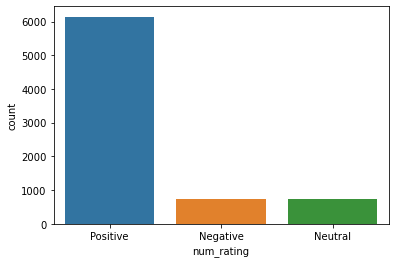

In [10]:
#Distrubution of the reviews
sns.countplot(x='num_rating', data=df)

We see from the chart, that most of review are postive 

In [11]:
#cheking missing value
df.isnull().sum()

num_rating    5
review        5
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
#cheking the numebr of letters in the text reiview in the case if we have an empty row 
df['length']=df['review'].apply(len)

In [14]:
#Replacing with Nan values it exist
df.replace(0, np.nan, inplace=True)

In [15]:
df.dropna(inplace=True)

In [16]:
df.head(5)

,num_rating,review,length
0,Positive,1 check-in Love love loved the vibe! Every cor...,550
1,Positive,"Listed in Date Night: Austin, vibe in Austin B...",285
2,Positive,1 check-in Listed in food seating I loved the ...,1259
3,Negative,Very cool vibe! Good drinks Nice seating Howe...,369
4,Positive,1 check-in They are location within the Northc...,633


<AxesSubplot:ylabel='Frequency'>

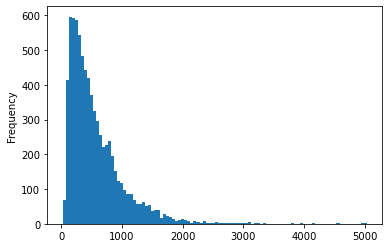

In [17]:
#distrubution of the length of all reviews 
df['length'].plot(bins=100, kind='hist')

From the chart, we can observe, that most of reviews are not longer than 100 letters

In [18]:
def clean(phrase):
    phrase = re.sub(r'@[A-Za-z0-9]+','', phrase) #remove mentions
    phrase = re.sub(r'#','', phrase) #remove hash
    phrase = re.sub(r'https?:\/\/\S+', '', phrase) #remove hyperlink
    phrase = re.sub('\s+', ' ', phrase) #remove new line char
    phrase = re.sub("\'", "", phrase) #remove single quotes
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])
    
df["review"] = df["review"].apply(clean)

In [19]:
from tqdm import tqdm
preprocessed_synopsis = []
# tqdm is for printing the status bar
for sentance in df["review"].values:
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = clean(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_synopsis.append(sentance.strip())
df["review"] =preprocessed_synopsis

In [20]:
import string
df["review"] = df["review"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
df["review"]= df["review"].apply(lambda wrd: ''.join(wrd))

In [21]:
from nltk.corpus import stopwords
df["review"][:50] = df["review"][:50].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words("english")]))

<ipython-input-21-631f1e6201f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"][:50] = df["review"][:50].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words("english")]))


In [22]:
df["review"]

0       check love love loved vibe every corner coffee...
1       listed date night austin vibe austin beautiful...
2       check listed food seating loved eclectic homey...
3       cool vibe good drinks nice seating however eve...
4       check location within northcross mall shopping...
                              ...                        
7611    actually step restaurant chance one favorites ...
7612    ok coffeeing seating awesome many great menu i...
7613    loved coming tea vibe pretty fresh ordered str...
7614    food average booths didnt feel clean waitstaff...
7615    finally stopped food colleague im glad delicio...
Name: review, Length: 7616, dtype: object

In [23]:
#Tokenizing and adding padding
from keras.preprocessing.text import Tokenizer
from keras import regularizers
max_words = 5000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
reviews = pad_sequences(sequences, maxlen=max_len)
print(reviews)

[[   0    0    0 ...    3  279 2091]
 [   0    0    0 ...  677  295   23]
 [   0    0    0 ...  736   98  818]
 ...
 [   0    0    0 ...  128  886   27]
 [   0    0    0 ...   16  122    4]
 [   0    0    0 ...  133   35  547]]


In [24]:
import tensorflow as tf
feedback = np.array(df['num_rating'])
y = []
for i in range(len(feedback)):
    if feedback [i] == 'Neutral':
        y.append(0)
    if feedback [i] == 'Negative':
        y.append(1)
    if feedback [i] == 'Positive':
        y.append(2)
y = np.array(y)
feedback  = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [25]:
feedback 

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

# 3.Modeling

As We said before, for modeling we are using LSTM algoritm to predict our reviews

In [26]:
from keras.layers import Embedding
from keras.models import Sequential
from keras import layers
embedding_layer = Embedding(1000, 64)
model = Sequential()
model.add(layers.Embedding(max_words, 40, input_length=max_len))
model.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model.add(layers.Dense(3,activation='softmax'))

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 40)           200000    
                                                                 
 bidirectional (Bidirectiona  (None, 40)               9760      
 l)                                                              
                                                                 
 dense (Dense)               (None, 3)                 123       
                                                                 
Total params: 209,883
Trainable params: 209,883
Non-trainable params: 0
_________________________________________________________________


In [28]:
#fit he model and spilt data in train set and validation 80% and 20%
history = model.fit(x = reviews, y= feedback , epochs=10,validation_split=0.2)

Epoch 1/10
191/191 [==============================] - 44s 195ms/step - loss: 0.6024 - accuracy: 0.8139 - val_loss: 0.5141 - val_accuracy: 0.7736
Epoch 2/10
191/191 [==============================] - 35s 182ms/step - loss: 0.3734 - accuracy: 0.8518 - val_loss: 0.4771 - val_accuracy: 0.8176
Epoch 3/10
191/191 [==============================] - 37s 191ms/step - loss: 0.2958 - accuracy: 0.8805 - val_loss: 0.4753 - val_accuracy: 0.8209
Epoch 4/10
191/191 [==============================] - 36s 188ms/step - loss: 0.2559 - accuracy: 0.8926 - val_loss: 0.6206 - val_accuracy: 0.8209
Epoch 5/10
191/191 [==============================] - 34s 176ms/step - loss: 0.2278 - accuracy: 0.9073 - val_loss: 0.6071 - val_accuracy: 0.8189
Epoch 6/10
191/191 [==============================] - 36s 188ms/step - loss: 0.1969 - accuracy: 0.9176 - val_loss: 0.7055 - val_accuracy: 0.8222
Epoch 7/10
191/191 [==============================] - 35s 184ms/step - loss: 0.1722 - accuracy: 0.9340 - val_loss: 0.6922 - val_ac

# 4. Evaluation

On the next charts, we can asses how our model performs and accurancy of the prediction

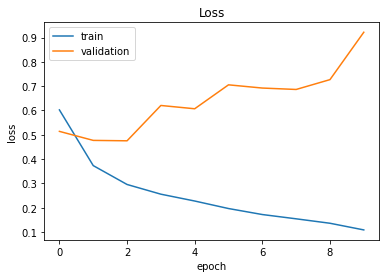

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

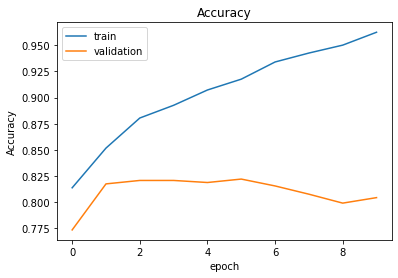

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

We see , that our model shows pretty good result. Our train accurancy is high around 95% and test peak is 82%.
Nevertheless it should be improved, because there is overfitting in the system and it may have an impact on the performance 

# 5. Summary

Lets test our model

In [35]:
sentiment = ['Neutral','Negative','Positive']
sequence = tokenizer.texts_to_sequences(['very bad'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 46ms/step


'Negative'

In [32]:
sequence = tokenizer.texts_to_sequences(['Amazing place, good location'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 44ms/step


'Positive'

In [34]:
sequence = tokenizer.texts_to_sequences(['noithing special'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 44ms/step


'Neutral'

We can see that our model shows good result and from text we can easily understand if it is postive or negative feedback.
Also, looking on the data distrubution most of reviews are positive and people are satisfited with the place and probaly they will come back or recommend this coffee places

Looking on the lenght of the reviews, usually people leave a short feedback( no more than 100 letters )

Summiraze the result, the targget of the project was achieved, we create a model that can recognize reviews and give an assesment of it  